<div style="text-align:right">Justine Charrel - Master 2 Internship</div>
This script plot the distribution in latitude and longitude of low, mid, high and total cloud cover for CALIPSO-GOCCP and for LMDZ6A, for annual and seasonal means, on east southern ocean.

### IMPORT

In [18]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np

### READ DATA

In [19]:
# CALIPSO-GOCCP
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_2DCloudCover_seasonal_2008-2022_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

In [20]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [21]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+'LmdzOr6Actrl_calipso_r144x90.nc'
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [22]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lat_austral = lat[lat <= -30]
lat_id_austral = lat <= -30

lon[lon > 180] -= 360
lon_id = np.argsort(lon)
lon = lon[lon_id]

lon_east = lon[lon>=0]
lon_id_east = lon >= 0

### LOAD VARIABLES

In [23]:
# GEOPOTENTIAL FOR MASK
g = 9.81 # m/s
alt_austral = nc_mask.variables['phis'][:,lat_id_austral,lon_id]/g #m
alt_austral = alt_austral[:,:,lon_id_east]

In [24]:
# MASK
mask_antarctica = np.where(alt_austral > 0.1, 1, np.nan) #pour masquer la partie antarctique

In [25]:
# CALIPSO-GOCCP
cllobs_austral = nc_obs.variables['cllcalipso'][:,lat_id_austral,lon_id]
clmobs_austral = nc_obs.variables['clmcalipso'][:,lat_id_austral,lon_id]
clhobs_austral = nc_obs.variables['clhcalipso'][:,lat_id_austral,lon_id]
cltobs_austral = nc_obs.variables['cltcalipso'][:,lat_id_austral,lon_id]

# LMDZ6A
clllmdz6a_austral = nc_lmdz6a.variables['cllcalipso'][:,lat_id_austral,lon_id]
clmlmdz6a_austral = nc_lmdz6a.variables['clmcalipso'][:,lat_id_austral,lon_id]
clhlmdz6a_austral = nc_lmdz6a.variables['clhcalipso'][:,lat_id_austral,lon_id]
cltlmdz6a_austral = nc_lmdz6a.variables['cltcalipso'][:,lat_id_austral,lon_id]

In [26]:
#SELECT ONLY EAST

# CALIPSO-GOCCP
cllobs_austral = cllobs_austral[:,:,lon_id_east]
clmobs_austral = clmobs_austral[:,:,lon_id_east]
clhobs_austral = clhobs_austral[:,:,lon_id_east]
cltobs_austral = cltobs_austral[:,:,lon_id_east]

# LMDZ6A
clllmdz6a_austral = clllmdz6a_austral[:,:,lon_id_east]
clmlmdz6a_austral = clmlmdz6a_austral[:,:,lon_id_east]
clhlmdz6a_austral = clhlmdz6a_austral[:,:,lon_id_east]
cltlmdz6a_austral = cltlmdz6a_austral[:,:,lon_id_east]

In [27]:
# MASK LMDZ6A WHERE THERE IS NO OBS DATA
mask_lat_obs_cll = np.where(cllobs_austral.mask == True, 1, np.nan)
mask_lat_obs_clm = np.where(clmobs_austral.mask == True, 1, np.nan)
mask_lat_obs_clh = np.where(clhobs_austral.mask == True, 1, np.nan)
mask_lat_obs_clt = np.where(cltobs_austral.mask == True, 1, np.nan)

clllmdz6a_austral = np.ma.masked_where(mask_lat_obs_cll >=0, clllmdz6a_austral)
clmlmdz6a_austral = np.ma.masked_where(mask_lat_obs_clm >=0, clmlmdz6a_austral)
clhlmdz6a_austral = np.ma.masked_where(mask_lat_obs_clh >=0, clhlmdz6a_austral)
cltlmdz6a_austral = np.ma.masked_where(mask_lat_obs_clt >=0, cltlmdz6a_austral)

In [28]:
# MASK ANTARCTICA FOR CALIPSO-GOCCP
cllobs_austral = np.ma.masked_where(mask_antarctica >=0, cllobs_austral)
clmobs_austral = np.ma.masked_where(mask_antarctica >=0, clmobs_austral)
clhobs_austral = np.ma.masked_where(mask_antarctica >=0, clhobs_austral)
cltobs_austral = np.ma.masked_where(mask_antarctica >=0, cltobs_austral)

# MASK ANTARCTICA FOR LMDZ6A
clllmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clllmdz6a_austral)
clmlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clmlmdz6a_austral)
clhlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, clhlmdz6a_austral)
cltlmdz6a_austral = np.ma.masked_where(mask_antarctica >=0, cltlmdz6a_austral)

In [29]:
#SELECT SEASONAL AND ANNUAL MEANS (LATITUDINAL)

# CALIPSO-GOCCP
cllobs_DJF = np.mean(np.mean(cllobs_austral, axis=2)[[0,1,11],:], axis=0)
cllobs_MAM = np.mean(np.mean(cllobs_austral, axis=2)[[2,3,4],:], axis=0)
cllobs_JJA = np.mean(np.mean(cllobs_austral, axis=2)[[5,6,7],:], axis=0)
cllobs_SON = np.mean(np.mean(cllobs_austral, axis=2)[[8,9,10],:], axis=0)
cllobs_seasons = np.ma.vstack((cllobs_DJF, cllobs_MAM, cllobs_JJA, cllobs_SON))
cllobs_mean = np.mean(cllobs_seasons, axis=0)

clmobs_DJF = np.mean(np.mean(clmobs_austral, axis=2)[[0,1,11],:], axis=0)
clmobs_MAM = np.mean(np.mean(clmobs_austral, axis=2)[[2,3,4],:], axis=0)
clmobs_JJA = np.mean(np.mean(clmobs_austral, axis=2)[[5,6,7],:], axis=0)
clmobs_SON = np.mean(np.mean(clmobs_austral, axis=2)[[8,9,10],:], axis=0)
clmobs_seasons = np.ma.vstack((clmobs_DJF, clmobs_MAM, clmobs_JJA, clmobs_SON))
clmobs_mean = np.mean(clmobs_seasons, axis=0)

clhobs_DJF = np.mean(np.mean(clhobs_austral, axis=2)[[0,1,11],:], axis=0)
clhobs_MAM = np.mean(np.mean(clhobs_austral, axis=2)[[2,3,4],:], axis=0)
clhobs_JJA = np.mean(np.mean(clhobs_austral, axis=2)[[5,6,7],:], axis=0)
clhobs_SON = np.mean(np.mean(clhobs_austral, axis=2)[[8,9,10],:], axis=0)
clhobs_seasons = np.ma.vstack((clhobs_DJF, clhobs_MAM, clhobs_JJA, clhobs_SON))
clhobs_mean = np.mean(clhobs_seasons, axis=0)

cltobs_DJF = np.mean(np.mean(cltobs_austral, axis=2)[[0,1,11],:], axis=0)
cltobs_MAM = np.mean(np.mean(cltobs_austral, axis=2)[[2,3,4],:], axis=0)
cltobs_JJA = np.mean(np.mean(cltobs_austral, axis=2)[[5,6,7],:], axis=0)
cltobs_SON = np.mean(np.mean(cltobs_austral, axis=2)[[8,9,10],:], axis=0)
cltobs_seasons = np.ma.vstack((cltobs_DJF, cltobs_MAM, cltobs_JJA, cltobs_SON))
cltobs_mean = np.mean(cltobs_seasons, axis=0)

# LMDZ6A
clllmdz6a_DJF = np.mean(np.mean(clllmdz6a_austral, axis=2)[[0,1,11],:], axis=0)
clllmdz6a_MAM = np.mean(np.mean(clllmdz6a_austral, axis=2)[[2,3,4],:], axis=0)
clllmdz6a_JJA = np.mean(np.mean(clllmdz6a_austral, axis=2)[[5,6,7],:], axis=0)
clllmdz6a_SON = np.mean(np.mean(clllmdz6a_austral, axis=2)[[8,9,10],:], axis=0)
clllmdz6a_seasons = np.ma.vstack((clllmdz6a_DJF, clllmdz6a_MAM, clllmdz6a_JJA, clllmdz6a_SON))
clllmdz6a_mean = np.mean(clllmdz6a_seasons, axis=0)

clmlmdz6a_DJF = np.mean(np.mean(clmlmdz6a_austral, axis=2)[[0,1,11],:], axis=0)
clmlmdz6a_MAM = np.mean(np.mean(clmlmdz6a_austral, axis=2)[[2,3,4],:], axis=0)
clmlmdz6a_JJA = np.mean(np.mean(clmlmdz6a_austral, axis=2)[[5,6,7],:], axis=0)
clmlmdz6a_SON = np.mean(np.mean(clmlmdz6a_austral, axis=2)[[8,9,10],:], axis=0)
clmlmdz6a_seasons = np.ma.vstack((clmlmdz6a_DJF, clmlmdz6a_MAM, clmlmdz6a_JJA, clmlmdz6a_SON))
clmlmdz6a_mean = np.mean(clmlmdz6a_seasons, axis=0)

clhlmdz6a_DJF = np.mean(np.mean(clhlmdz6a_austral, axis=2)[[0,1,11],:], axis=0)
clhlmdz6a_MAM = np.mean(np.mean(clhlmdz6a_austral, axis=2)[[2,3,4],:], axis=0)
clhlmdz6a_JJA = np.mean(np.mean(clhlmdz6a_austral, axis=2)[[5,6,7],:], axis=0)
clhlmdz6a_SON = np.mean(np.mean(clhlmdz6a_austral, axis=2)[[8,9,10],:], axis=0)
clhlmdz6a_seasons = np.ma.vstack((clhlmdz6a_DJF, clhlmdz6a_MAM, clhlmdz6a_JJA, clhlmdz6a_SON))
clhlmdz6a_mean = np.mean(clhlmdz6a_seasons, axis=0)

cltlmdz6a_DJF = np.mean(np.mean(cltlmdz6a_austral, axis=2)[[0,1,11],:], axis=0)
cltlmdz6a_MAM = np.mean(np.mean(cltlmdz6a_austral, axis=2)[[2,3,4],:], axis=0)
cltlmdz6a_JJA = np.mean(np.mean(cltlmdz6a_austral, axis=2)[[5,6,7],:], axis=0)
cltlmdz6a_SON = np.mean(np.mean(cltlmdz6a_austral, axis=2)[[8,9,10],:], axis=0)
cltlmdz6a_seasons = np.ma.vstack((cltlmdz6a_DJF, cltlmdz6a_MAM, cltlmdz6a_JJA, cltlmdz6a_SON))
cltlmdz6a_mean = np.mean(cltlmdz6a_seasons, axis=0)

total_obs_seasons = np.ma.dstack((cllobs_seasons,clmobs_seasons,clhobs_seasons,cltobs_seasons))*100
total_obs_mean = np.ma.vstack((cllobs_mean,clmobs_mean,clhobs_mean,cltobs_mean))*100
total_lmdz6a_seasons = np.ma.dstack((clllmdz6a_seasons,clmlmdz6a_seasons,clhlmdz6a_seasons,cltlmdz6a_seasons))*100
total_lmdz6a_mean = np.ma.vstack((clllmdz6a_mean,clmlmdz6a_mean,clhlmdz6a_mean,cltlmdz6a_mean))*100

### PLOT LATITUDINAL DISTRIBUTION

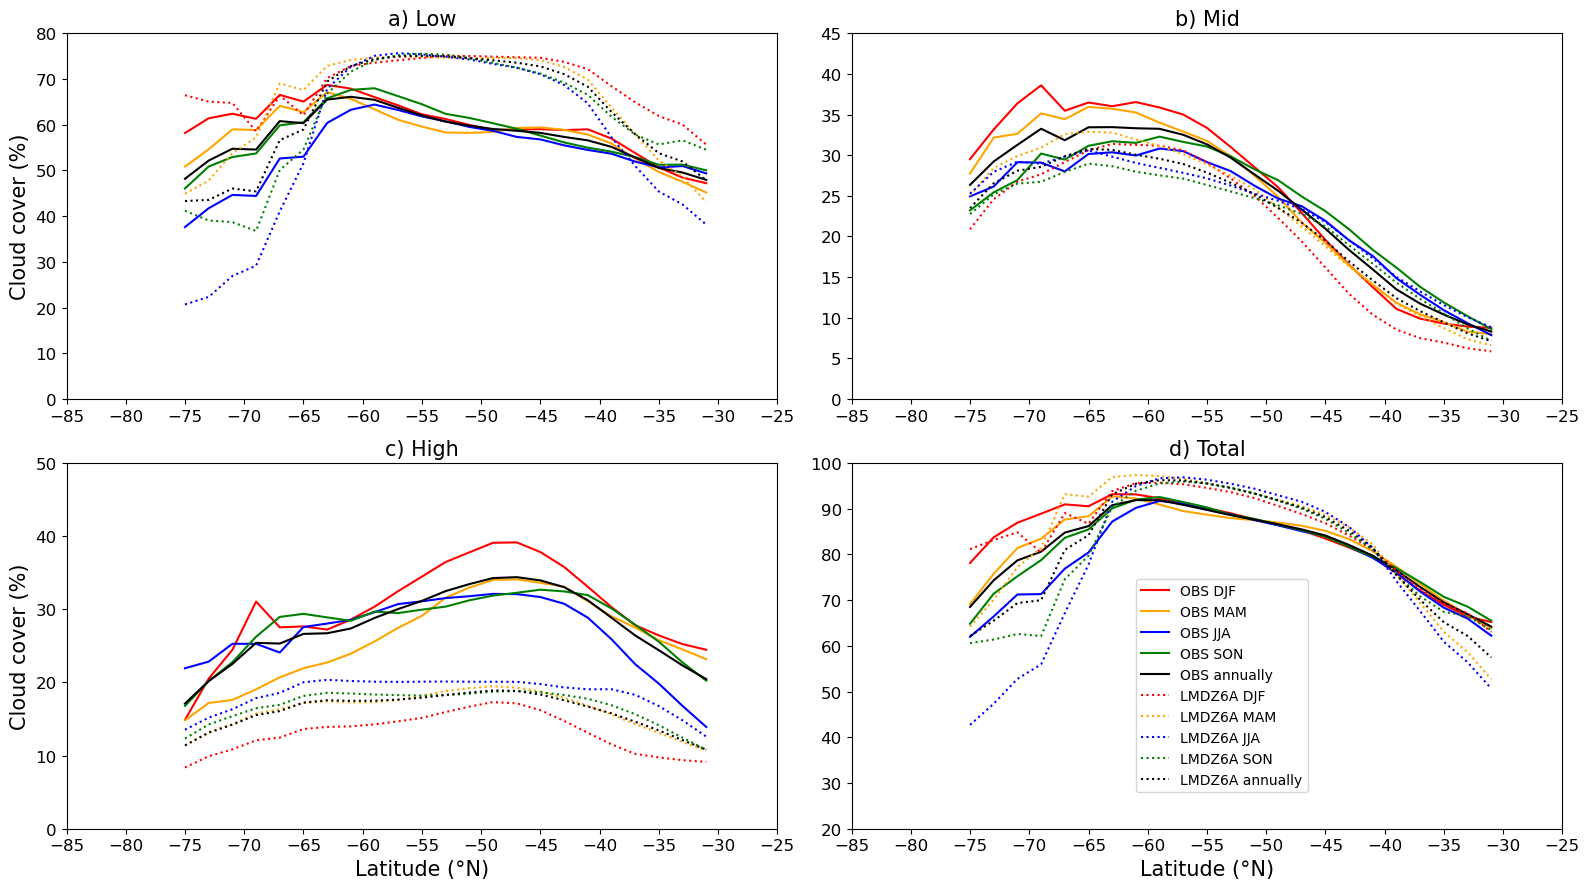

In [30]:
fig, axes = plt.subplots(figsize=(16,9), nrows=2, ncols=2)

titles = ["a) Low", "b) Mid", "c) High", "d) Total"]
ylabels = ["Cloud cover (%)", None, "Cloud cover (%)", None]
xlabels = [None, None, "Latitude (°N)", "Latitude (°N)"]
ylims = [(0, 80), (0, 45), (0, 50), (20, 100)]

pltcounter = 0
for plotid in axes.flat:

    plotid.plot(lat_austral,total_obs_seasons[0,:,pltcounter], c='r', label='OBS DJF')
    plotid.plot(lat_austral,total_obs_seasons[1,:,pltcounter], c='orange', label='OBS MAM')
    plotid.plot(lat_austral,total_obs_seasons[2,:,pltcounter], c='b', label='OBS JJA')
    plotid.plot(lat_austral,total_obs_seasons[3,:,pltcounter], c='g', label='OBS SON')
    plotid.plot(lat_austral, total_obs_mean[pltcounter,:], c='k', label='OBS annually')
    plotid.plot(lat_austral,total_lmdz6a_seasons[0,:,pltcounter], ':', c='r', label='LMDZ6A DJF')
    plotid.plot(lat_austral,total_lmdz6a_seasons[1,:,pltcounter], ':', c='orange', label='LMDZ6A MAM')
    plotid.plot(lat_austral,total_lmdz6a_seasons[2,:,pltcounter], ':', c='b', label='LMDZ6A JJA')
    plotid.plot(lat_austral,total_lmdz6a_seasons[3,:,pltcounter], ':', c='g', label='LMDZ6A SON')
    plotid.plot(lat_austral, total_lmdz6a_mean[pltcounter,:], ':', c='k', label='LMDZ6A annually')
    
    plotid.set_title(titles[pltcounter], size=15)
    if ylabels[pltcounter]:
        plotid.set_ylabel(ylabels[pltcounter], size=15)
    if xlabels[pltcounter]:
        plotid.set_xlabel(xlabels[pltcounter], size=15)
    plotid.set_xticks(np.arange(-85,-20,5))
    plotid.set_ylim(ylims[pltcounter])
    plotid.tick_params(axis='both', labelsize=12)
    if pltcounter == 3:
        plotid.legend(loc=(0.4,0.1))
    pltcounter = pltcounter + 1
    
fig.tight_layout()
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/2DCloudCover/lat_distribution/'
plt.savefig(path_fig+'2DCloudCover_lat_distribution_southern_ocean_east.png',dpi=300)

In [31]:
# SELECT SEASONAL AND ANNUAL MEANS (LONGITUDINAL)

# OBS
cllobs_DJF = np.mean(np.mean(cllobs_austral, axis=1)[[0,1,11],:], axis=0)
cllobs_MAM = np.mean(np.mean(cllobs_austral, axis=1)[[2,3,4],:], axis=0)
cllobs_JJA = np.mean(np.mean(cllobs_austral, axis=1)[[5,6,7],:], axis=0)
cllobs_SON = np.mean(np.mean(cllobs_austral, axis=1)[[8,9,10],:], axis=0)
cllobs_seasons = np.ma.vstack((cllobs_DJF, cllobs_MAM, cllobs_JJA, cllobs_SON))
cllobs_mean = np.mean(cllobs_seasons, axis=0)

clmobs_DJF = np.mean(np.mean(clmobs_austral, axis=1)[[0,1,11],:], axis=0)
clmobs_MAM = np.mean(np.mean(clmobs_austral, axis=1)[[2,3,4],:], axis=0)
clmobs_JJA = np.mean(np.mean(clmobs_austral, axis=1)[[5,6,7],:], axis=0)
clmobs_SON = np.mean(np.mean(clmobs_austral, axis=1)[[8,9,10],:], axis=0)
clmobs_seasons = np.ma.vstack((clmobs_DJF, clmobs_MAM, clmobs_JJA, clmobs_SON))
clmobs_mean = np.mean(clmobs_seasons, axis=0)

clhobs_DJF = np.mean(np.mean(clhobs_austral, axis=1)[[0,1,11],:], axis=0)
clhobs_MAM = np.mean(np.mean(clhobs_austral, axis=1)[[2,3,4],:], axis=0)
clhobs_JJA = np.mean(np.mean(clhobs_austral, axis=1)[[5,6,7],:], axis=0)
clhobs_SON = np.mean(np.mean(clhobs_austral, axis=1)[[8,9,10],:], axis=0)
clhobs_seasons = np.ma.vstack((clhobs_DJF, clhobs_MAM, clhobs_JJA, clhobs_SON))
clhobs_mean = np.mean(clhobs_seasons, axis=0)

cltobs_DJF = np.mean(np.mean(cltobs_austral, axis=1)[[0,1,11],:], axis=0)
cltobs_MAM = np.mean(np.mean(cltobs_austral, axis=1)[[2,3,4],:], axis=0)
cltobs_JJA = np.mean(np.mean(cltobs_austral, axis=1)[[5,6,7],:], axis=0)
cltobs_SON = np.mean(np.mean(cltobs_austral, axis=1)[[8,9,10],:], axis=0)
cltobs_seasons = np.ma.vstack((cltobs_DJF, cltobs_MAM, cltobs_JJA, cltobs_SON))
cltobs_mean = np.mean(cltobs_seasons, axis=0)

# LMDZ6A
clllmdz6a_DJF = np.mean(np.mean(clllmdz6a_austral, axis=1)[[0,1,11],:], axis=0)
clllmdz6a_MAM = np.mean(np.mean(clllmdz6a_austral, axis=1)[[2,3,4],:], axis=0)
clllmdz6a_JJA = np.mean(np.mean(clllmdz6a_austral, axis=1)[[5,6,7],:], axis=0)
clllmdz6a_SON = np.mean(np.mean(clllmdz6a_austral, axis=1)[[8,9,10],:], axis=0)
clllmdz6a_seasons = np.vstack((clllmdz6a_DJF, clllmdz6a_MAM, clllmdz6a_JJA, clllmdz6a_SON))
clllmdz6a_mean = np.mean(clllmdz6a_seasons, axis=0)

clmlmdz6a_DJF = np.mean(np.mean(clmlmdz6a_austral, axis=1)[[0,1,11],:], axis=0)
clmlmdz6a_MAM = np.mean(np.mean(clmlmdz6a_austral, axis=1)[[2,3,4],:], axis=0)
clmlmdz6a_JJA = np.mean(np.mean(clmlmdz6a_austral, axis=1)[[5,6,7],:], axis=0)
clmlmdz6a_SON = np.mean(np.mean(clmlmdz6a_austral, axis=1)[[8,9,10],:], axis=0)
clmlmdz6a_seasons = np.vstack((clmlmdz6a_DJF, clmlmdz6a_MAM, clmlmdz6a_JJA, clmlmdz6a_SON))
clmlmdz6a_mean = np.mean(clmlmdz6a_seasons, axis=0)

clhlmdz6a_DJF = np.mean(np.mean(clhlmdz6a_austral, axis=1)[[0,1,11],:], axis=0)
clhlmdz6a_MAM = np.mean(np.mean(clhlmdz6a_austral, axis=1)[[2,3,4],:], axis=0)
clhlmdz6a_JJA = np.mean(np.mean(clhlmdz6a_austral, axis=1)[[5,6,7],:], axis=0)
clhlmdz6a_SON = np.mean(np.mean(clhlmdz6a_austral, axis=1)[[8,9,10],:], axis=0)
clhlmdz6a_seasons = np.vstack((clhlmdz6a_DJF, clhlmdz6a_MAM, clhlmdz6a_JJA, clhlmdz6a_SON))
clhlmdz6a_mean = np.mean(clhlmdz6a_seasons, axis=0)

cltlmdz6a_DJF = np.mean(np.mean(cltlmdz6a_austral, axis=1)[[0,1,11],:], axis=0)
cltlmdz6a_MAM = np.mean(np.mean(cltlmdz6a_austral, axis=1)[[2,3,4],:], axis=0)
cltlmdz6a_JJA = np.mean(np.mean(cltlmdz6a_austral, axis=1)[[5,6,7],:], axis=0)
cltlmdz6a_SON = np.mean(np.mean(cltlmdz6a_austral, axis=1)[[8,9,10],:], axis=0)
cltlmdz6a_seasons = np.vstack((cltlmdz6a_DJF, cltlmdz6a_MAM, cltlmdz6a_JJA, cltlmdz6a_SON))
cltlmdz6a_mean = np.mean(cltlmdz6a_seasons, axis=0)

total_obs_seasons = np.ma.dstack((cllobs_seasons,clmobs_seasons,clhobs_seasons,cltobs_seasons))*100
total_obs_mean = np.ma.vstack((cllobs_mean,clmobs_mean,clhobs_mean,cltobs_mean))*100
total_lmdz6a_seasons = np.ma.dstack((clllmdz6a_seasons,clmlmdz6a_seasons,clhlmdz6a_seasons,cltlmdz6a_seasons))*100
total_lmdz6a_mean = np.ma.vstack((clllmdz6a_mean,clmlmdz6a_mean,clhlmdz6a_mean,cltlmdz6a_mean))*100

### PLOT LONGITUDINAL DISTRIBUTION

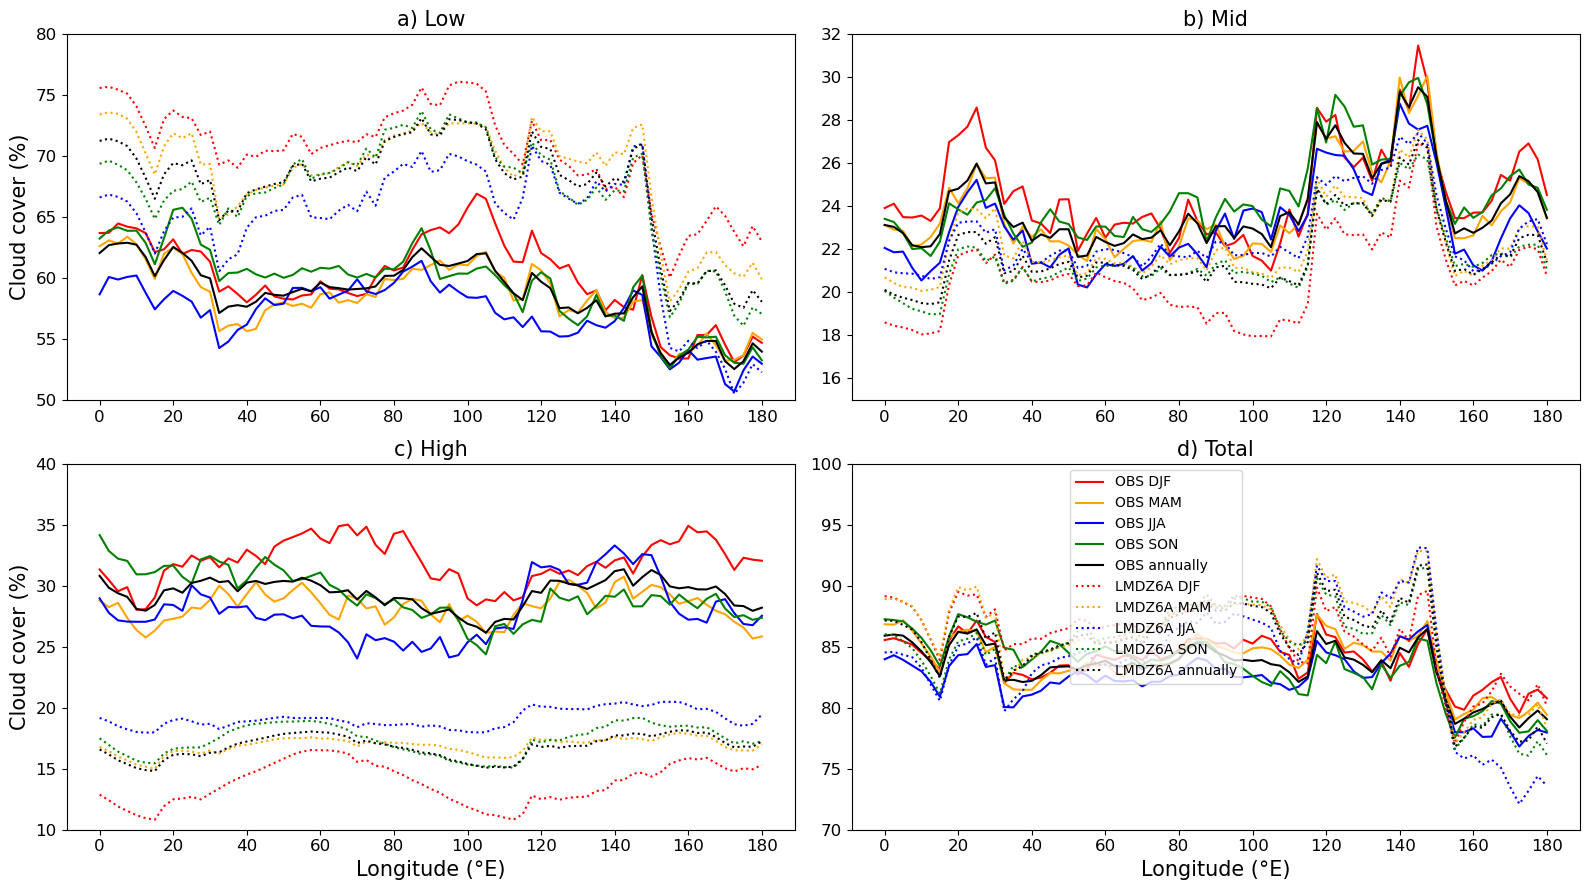

In [43]:
fig, axes = plt.subplots(figsize=(16,9), nrows=2, ncols=2)

titles = ["a) Low", "b) Mid", "c) High", "d) Total"]
ylabels = ["Cloud cover (%)", None, "Cloud cover (%)", None]
xlabels = [None, None, "Longitude (°E)", "Longitude (°E)"]
ylims = [(50, 80), (15, 32), (10, 40), (70, 100)]

pltcounter = 0
for plotid in axes.flat:

    plotid.plot(lon_east,total_obs_seasons[0,:,pltcounter], c='r', label='OBS DJF')
    plotid.plot(lon_east,total_obs_seasons[1,:,pltcounter], c='orange', label='OBS MAM')
    plotid.plot(lon_east,total_obs_seasons[2,:,pltcounter], c='b', label='OBS JJA')
    plotid.plot(lon_east,total_obs_seasons[3,:,pltcounter], c='g', label='OBS SON')
    plotid.plot(lon_east, total_obs_mean[pltcounter,:], c='k', label='OBS annually')
    plotid.plot(lon_east,total_lmdz6a_seasons[0,:,pltcounter], ':', c='r', label='LMDZ6A DJF')
    plotid.plot(lon_east,total_lmdz6a_seasons[1,:,pltcounter], ':', c='orange', label='LMDZ6A MAM')
    plotid.plot(lon_east,total_lmdz6a_seasons[2,:,pltcounter], ':', c='b', label='LMDZ6A JJA')
    plotid.plot(lon_east,total_lmdz6a_seasons[3,:,pltcounter], ':', c='g', label='LMDZ6A SON')
    plotid.plot(lon_east, total_lmdz6a_mean[pltcounter,:], ':', c='k', label='LMDZ6A annually')
    
    plotid.set_title(titles[pltcounter], size=15)
    if ylabels[pltcounter]:
        plotid.set_ylabel(ylabels[pltcounter], size=15)
    if xlabels[pltcounter]:
        plotid.set_xlabel(xlabels[pltcounter], size=15)
    plotid.set_ylim(ylims[pltcounter])
    plotid.set_xticks(np.arange(0,190,20))
    plotid.tick_params(axis='both', labelsize=12)
    if pltcounter == 3:
        plotid.legend(loc=(0.3,0.4))
    pltcounter = pltcounter + 1
    
fig.tight_layout()
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/2DCloudCover/lon_distribution/'
plt.savefig(path_fig+'2DCloudCover_lon_distribution_southern_ocean_east.png',dpi=300)